# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import os



# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

573

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# call API

url="http://api.openweathermap.org/data/2.5/weather?"
units="Imperial"
# query_url=f"{url}appid={api_key}&units={units}&q={city}"
# print(query_url)


In [4]:
# my_cities=[]

In [21]:
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
query_url=f"{url}appid={api_key}&units={units}&q="

# List of city data
city_data=[]
lat=[]
lon=[]
temp=[]
humidity=[]
wind_speed=[]
country=[]
date=[]
cloudiness=[]

for city in cities:

    city_url = query_url+city
    
    try:
            # Parse the JSON and retrieve data
            city_weather = requests.get(city_url).json()

            # Parse out the max temp, humidity, and cloudiness
            city_lat=city_weather["coord"]["lat"]
            city_lng=city_weather["coord"]["lon"]
            city_temp=city_weather["main"]["temp"]
            city_humidity=city_weather["main"]["humidity"]
            city_clouds=city_weather["clouds"]["all"]
            city_wind=city_weather["wind"]["speed"]
            city_country=city_weather["sys"]["country"]
            city_date=city_weather["dt"]

            
            city_data.append({"City":city, 
                          "Lat":city_lat, 
                          "Lng":city_lng, 
                          "Temp":city_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                            "Date":city_date})
            
            


    except:
        pass

In [33]:
print(url)

http://api.openweathermap.org/data/2.5/weather?


In [34]:
print(url+city)

http://api.openweathermap.org/data/2.5/weather?sidi ali


In [37]:
print(city_data)

[{'City': 'east london', 'Lat': -33.02, 'Lng': 27.91, 'Temp': 68, 'Humidity': 60, 'Cloudiness': 18, 'Wind Speed': 12.75, 'Country': 'ZA', 'Date': 1574745931}, {'City': 'mataura', 'Lat': -46.19, 'Lng': 168.86, 'Temp': 66.6, 'Humidity': 72, 'Cloudiness': 73, 'Wind Speed': 4.7, 'Country': 'NZ', 'Date': 1574745931}, {'City': 'argentan', 'Lat': 48.74, 'Lng': -0.02, 'Temp': 49.5, 'Humidity': 93, 'Cloudiness': 90, 'Wind Speed': 10.29, 'Country': 'FR', 'Date': 1574745931}, {'City': 'cuauhtemoc', 'Lat': 28.72, 'Lng': -111.63, 'Temp': 61.27, 'Humidity': 81, 'Cloudiness': 100, 'Wind Speed': 10, 'Country': 'MX', 'Date': 1574745932}, {'City': 'saskylakh', 'Lat': 71.97, 'Lng': 114.09, 'Temp': -13.23, 'Humidity': 94, 'Cloudiness': 100, 'Wind Speed': 5.88, 'Country': 'RU', 'Date': 1574745932}, {'City': 'bambous virieux', 'Lat': -20.34, 'Lng': 57.76, 'Temp': 82.17, 'Humidity': 78, 'Cloudiness': 75, 'Wind Speed': 11.41, 'Country': 'MU', 'Date': 1574745932}, {'City': 'sinnamary', 'Lat': 5.38, 'Lng': -52.

In [39]:
len(cities)

573

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
city_df=pd.DataFrame(city_data)
city_df.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.02,27.91,68.00,60,18,12.75,ZA,1574745931
1,mataura,-46.19,168.86,66.60,72,73,4.70,NZ,1574745931
2,argentan,48.74,-0.02,49.50,93,90,10.29,FR,1574745931
3,cuauhtemoc,28.72,-111.63,61.27,81,100,10.00,MX,1574745932
4,saskylakh,71.97,114.09,-13.23,94,100,5.88,RU,1574745932


In [ ]:
# city_data_df.to_csv()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

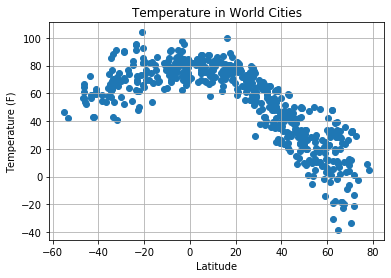

In [47]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"],city_df["Temp"],marker='o')

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("temp_vs_lat.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

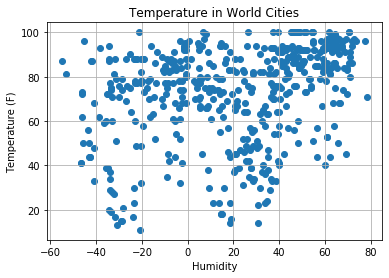

In [48]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"],city_df["Humidity"],marker='o')

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("humidity_vs_lat.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

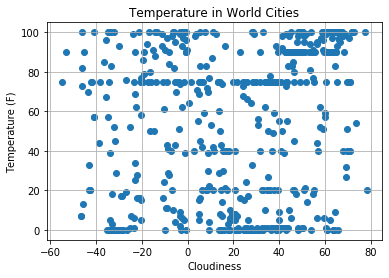

In [49]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"],city_df["Cloudiness"],marker='o')

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("clouds_vs_lat.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

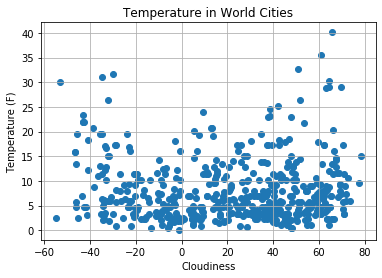

In [52]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"],city_df["Wind Speed"],marker='o')

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("clouds_vs_lat.png")

# Show plot
plt.show()